In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv('TaxInfo.csv')
df=df.dropna(how='any')
df=df.drop(columns=['Unnamed: 0'])
df

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent
...,...,...,...,...,...,...,...,...,...,...
999,37626,20830,0,1,38,4,0,1,0,Democrat
1000,79765,63483,2,1,71,5,0,1,0,Republican
1001,111219,-573449,0,4,35,2,0,0,0,Republican
1002,105591,-611207,0,1,59,1,1,1,0,Republican


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['PoliticalParty']=le.fit_transform(df['PoliticalParty'])
df

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,0
1,64756,-507342,2,3,68,3,1,0,0,1
2,115435,521290,1,3,81,2,0,1,0,2
3,99454,251829,2,1,52,4,1,0,0,2
4,157274,-472337,0,1,28,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
999,37626,20830,0,1,38,4,0,1,0,0
1000,79765,63483,2,1,71,5,0,1,0,2
1001,111219,-573449,0,4,35,2,0,0,0,2
1002,105591,-611207,0,1,59,1,1,1,0,2


In [53]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
X_train

array([[ 221642, -430778,       2, ...,       0,       0,       1],
       [ 213551,  549486,       0, ...,       1,       1,       1],
       [ 258049, -505412,       1, ...,       1,       1,       0],
       ...,
       [  27895,  807147,       0, ...,       1,       0,       1],
       [ 116951,  560163,       0, ...,       0,       0,       1],
       [ 118451, -322270,       2, ...,       1,       1,       0]])

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,:1]=sc.fit_transform(X_train[:,:1])
X_test[:,:1]=sc.fit_transform(X_test[:,:1])
X_train[:,1:2]=sc.fit_transform(X_train[:,1:2])
X_test[:,1:2]=sc.fit_transform(X_test[:,1:2])


In [56]:
X_train

array([[ 221642, -430778,       2, ...,       0,       0,       1],
       [ 213551,  549486,       0, ...,       1,       1,       1],
       [ 258049, -505412,       1, ...,       1,       1,       0],
       ...,
       [  27895,  807147,       0, ...,       1,       0,       1],
       [ 116951,  560163,       0, ...,       0,       0,       1],
       [ 118451, -322270,       2, ...,       1,       1,       0]])

In [57]:
X_train=X_train.astype(np.float32)
X_train

array([[ 2.21642e+05, -4.30778e+05,  2.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 2.13551e+05,  5.49486e+05,  0.00000e+00, ...,  1.00000e+00,
         1.00000e+00,  1.00000e+00],
       [ 2.58049e+05, -5.05412e+05,  1.00000e+00, ...,  1.00000e+00,
         1.00000e+00,  0.00000e+00],
       ...,
       [ 2.78950e+04,  8.07147e+05,  0.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 1.16951e+05,  5.60163e+05,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 1.18451e+05, -3.22270e+05,  2.00000e+00, ...,  1.00000e+00,
         1.00000e+00,  0.00000e+00]], dtype=float32)

In [58]:
X_test=X_test.astype(np.float32)
X_test

array([[ 2.57867e+05,  4.28139e+05,  0.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.39039e+05, -4.41265e+05,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 9.83520e+04,  2.26621e+05,  0.00000e+00, ...,  0.00000e+00,
         1.00000e+00,  1.00000e+00],
       ...,
       [ 2.44274e+05,  5.63344e+05,  1.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  1.00000e+00],
       [ 4.67580e+04, -7.53137e+05,  1.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 2.44097e+05, -5.35697e+05,  2.00000e+00, ...,  1.00000e+00,
         1.00000e+00,  0.00000e+00]], dtype=float32)

In [59]:
y_test=y_test.astype(np.float32)
y_test

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 2., 0., 1., 0., 0., 0.,
       2., 1., 2., 2., 1., 0., 2., 1., 2., 0., 1., 0., 2., 2., 2., 0., 1.,
       0., 0., 1., 2., 2., 0., 2., 1., 0., 1., 2., 2., 2., 2., 1., 2., 1.,
       1., 1., 1., 0., 0., 1., 2., 1., 1., 0., 0., 0., 1., 2., 0., 0., 1.,
       2., 1., 1., 2., 1., 1., 2., 0., 2., 0., 0., 2., 2., 0., 1., 0., 0.,
       0., 2., 1., 2., 0., 1., 2., 0., 0., 1., 1., 1., 2., 2., 1., 0., 2.,
       0., 1., 0., 1., 1., 0., 0., 2., 2., 1., 0., 1., 0., 0., 2., 2., 1.,
       1., 0., 2., 2., 0., 2., 0., 2., 0., 0., 0., 2., 1., 1., 2., 0., 0.,
       1., 0., 0., 2., 0., 1., 0., 1., 0., 2., 1., 2., 1., 2., 2., 0., 0.,
       2., 2., 0., 1., 1., 1., 0., 0., 2., 2., 1., 0., 1., 1., 1., 2., 1.,
       0., 2., 1., 0., 2., 1., 0., 0., 2., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 2., 0., 2., 0., 1., 0., 1., 2., 1., 0., 2., 0., 0., 1., 2., 1.,
       0., 2., 2., 1., 2., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 0., 1., 1.

In [60]:
y_train=y_train.astype(np.float32)
y_train

array([1., 0., 1., 0., 2., 1., 2., 0., 0., 0., 0., 2., 1., 2., 2., 0., 2.,
       1., 2., 2., 0., 2., 0., 0., 0., 0., 0., 2., 1., 2., 0., 0., 2., 2.,
       2., 1., 2., 1., 0., 1., 2., 1., 1., 1., 2., 1., 1., 0., 2., 0., 0.,
       1., 2., 0., 1., 0., 1., 0., 2., 2., 2., 0., 1., 2., 1., 1., 0., 2.,
       2., 2., 1., 1., 2., 1., 1., 0., 1., 2., 1., 1., 0., 1., 0., 0., 2.,
       0., 1., 1., 2., 0., 2., 0., 2., 0., 2., 1., 2., 1., 1., 2., 1., 0.,
       0., 2., 2., 0., 0., 0., 0., 0., 1., 2., 0., 0., 1., 0., 1., 2., 2.,
       2., 0., 0., 1., 1., 1., 2., 1., 0., 1., 1., 2., 0., 0., 2., 1., 0.,
       0., 2., 2., 1., 2., 1., 1., 0., 2., 0., 2., 1., 1., 2., 2., 1., 0.,
       0., 2., 2., 0., 0., 1., 0., 2., 1., 2., 0., 0., 2., 1., 2., 1., 0.,
       0., 0., 1., 1., 0., 2., 1., 1., 1., 0., 2., 2., 0., 1., 1., 1., 2.,
       0., 1., 2., 0., 2., 1., 1., 2., 0., 2., 1., 2., 0., 1., 1., 0., 0.,
       2., 0., 2., 0., 1., 1., 2., 1., 0., 1., 1., 1., 1., 2., 1., 0., 1.,
       2., 2., 1., 2., 1.

In [61]:
y_test=tf.keras.utils.to_categorical(y_test)
y_train=tf.keras.utils.to_categorical(y_train)

In [62]:
X_test=X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [63]:
X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [68]:
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.layers.Dense(units=500, activation='relu'))
lstm.add(tf.keras.layers.Dense(units=1000, activation='relu'))
lstm.add(tf.keras.layers.LSTM(units = 1500))
lstm.add(tf.keras.layers.Dense(units=2500, activation='relu'))
lstm.add(tf.keras.layers.Dense(3,activation='softmax'))
print("Model initialised")


Model initialised


In [70]:
lstm.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
history=lstm.fit(X_train, y_train, batch_size=500, epochs=250)
lstm.save('Tax.h5')

Epoch 1/250
2/2 [==============================] - 16s 5s/step - loss: 1.1346 - accuracy: 0.5952
Epoch 2/250
2/2 [==============================] - 13s 4s/step - loss: 1.8516 - accuracy: 0.4344
Epoch 3/250
2/2 [==============================] - 13s 5s/step - loss: 1.1627 - accuracy: 0.4293
Epoch 4/250
2/2 [==============================] - 13s 5s/step - loss: 1.0647 - accuracy: 0.4402
Epoch 5/250
2/2 [==============================] - 13s 5s/step - loss: 1.0662 - accuracy: 0.4182
Epoch 6/250
2/2 [==============================] - 13s 5s/step - loss: 1.0292 - accuracy: 0.4665
Epoch 7/250
2/2 [==============================] - 13s 5s/step - loss: 1.0106 - accuracy: 0.4712
Epoch 8/250
2/2 [==============================] - 13s 5s/step - loss: 0.9928 - accuracy: 0.4872
Epoch 9/250
2/2 [==============================] - 13s 5s/step - loss: 0.9867 - accuracy: 0.5162
Epoch 10/250
2/2 [==============================] - 13s 5s/step - loss: 0.9718 - accuracy: 0.4905
Epoch 11/250
2/2 [===========

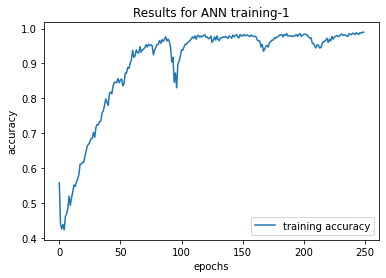

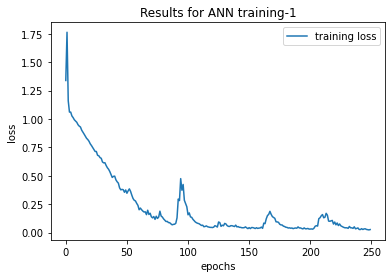

In [71]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Results for ANN training-1')
plt.savefig('Loss.png')

In [72]:
model = tf.keras.models.load_model('Tax.h5')
print("Loaded model from disk")

Loaded model from disk


In [73]:
res = model.predict(X_test)
res=np.round(res)
np.set_printoptions(precision=2)
print(res)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

In [74]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,res)*100),2))

Accuracy Score for the algorithm=>40%
